In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
data = data.dropna()
print("shape of data", data.shape)

shape of data (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [9]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

In [10]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


## Linear Regression

### Traning Model

In [19]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 25.7 MB/s eta 0:00:000m eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.7 MB/s eta 0:00:000m eta 0:00:010:00:01


In [29]:
linear_model = LinearRegression()

In [30]:
linear_model.fit(train_input, train_output)

LinearRegression()

In [31]:
linear_model.coef_

array([[1.0009993]])

In [32]:
linear_model.intercept_

array([-0.23603461])

### Prediction

In [35]:
test_predictions = linear_model.predict(test_input)

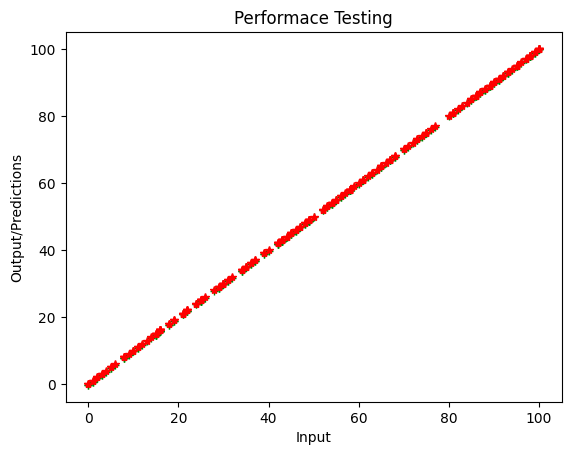

In [37]:
plt.plot(test_input, test_predictions, "+" , color = "green")
plt.plot(test_input, test_output, "*" , color = "red")
plt.title("Performace Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

### Cost

In [40]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, test_predictions)
cost

0.034924736049890076